In [17]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

# Read model (model of Escherichia coli)
model = read_sbml_model('model_atocopherol.xml')

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

# Yield

In [21]:
model.objective = model.reactions.DM_avite1_c
avite_production = model.optimize().objective_value
theor_yield = avite_production / (-1*model.reactions.EX_glc__D_e.flux)
print("max. alpha-tocopherol production [mmol gDW^-1 h^-1]:", avite_production)
print("max. theoretical yield [mmol-put / mmol-glc]:", theor_yield)

max. alpha-tocopherol production [mmol gDW^-1 h^-1]: 1.2228500311138784
max. theoretical yield [mmol-put / mmol-glc]: 0.12228500311138783


In [20]:
with model:
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.44
    avite_production = model.optimize().objective_value
    theor_yield = avite_production / (-1*model.reactions.EX_glc__D_e.flux)
print('Maximum theoretical biomass productivity:', solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'], '/h') 
print("max. alpha-tocopherol production [mmol gDW^-1 h^-1]:", avite_production)
print("max. theoretical yield [mmol-put / mmol-glc]:", theor_yield)

Maximum theoretical biomass productivity: 0.44 /h
max. alpha-tocopherol production [mmol gDW^-1 h^-1]: 0.6133904007420822
max. theoretical yield [mmol-put / mmol-glc]: 0.06133904007420822


# Modifying medium

In [4]:
model.medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}

The default medium of the model does not contain any aminoacids. To increase the flux into the added pathway, tyrosine was added to the medium.

In [5]:
tyr_medium = model.medium
tyr_medium['EX_tyr__L_e'] = 10.0

In [6]:
model.medium = tyr_medium
model.objective = model.reactions.DM_avite1_c

with model:
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.44
    solution = model.optimize()
    avite_production = model.optimize().objective_value
    theor_yield = avite_production / (-1*model.reactions.EX_glc__D_e.flux)
print('Maximum theoretical biomass productivity:', solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'], '/h') 
print("max. alpha-tocopherol production [mmol gDW^-1 h^-1]:", avite_production)
print("max. theoretical yield [mmol-put / mmol-glc]:", theor_yield)

Maximum theoretical biomass productivity: 0.44 /h
max. alpha-tocopherol production [mmol gDW^-1 h^-1]: 0.7989720203366959
max. theoretical yield [mmol-put / mmol-glc]: 0.0798972020336696


In [13]:
model.medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_tyr__L_e': 10.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}

In [14]:
from cobra.io import write_sbml_model
write_sbml_model(model,"model_atocopherol_tyr.xml")

# Phenotypic phase planes
## Aerobic conditions

In [8]:
# phenotypic phase planes analysis
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

<AxesSubplot:title={'center':'alpha-tocopherol production as a function of tyrosine exchange reaction'}, xlabel='EX_tyr__L_e'>

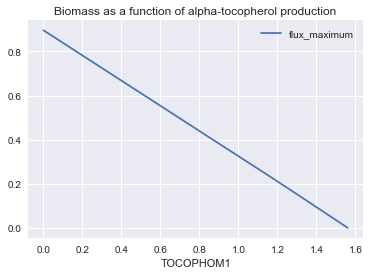

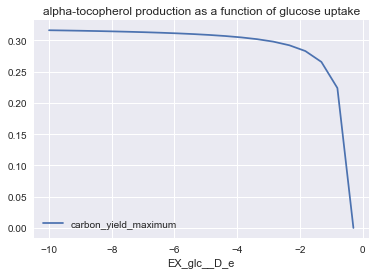

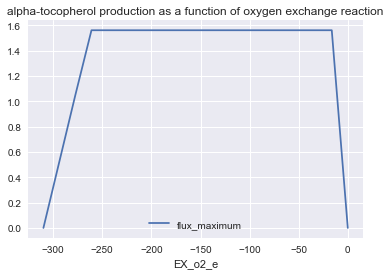

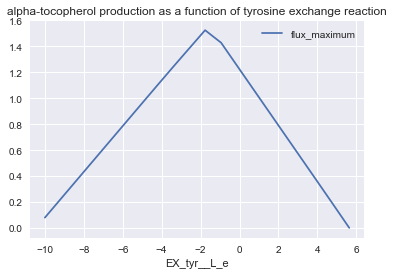

In [9]:
ppp_BIOMASS = production_envelope(model,
            reactions=[model.reactions.DM_avite1_c],
            objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
ppp_avite = production_envelope(model,
            reactions=[model.reactions.EX_glc__D_e],
            objective=model.reactions.DM_avite1_c)
ppp_o2 = production_envelope(model,
            reactions=[model.reactions.EX_o2_e],
            objective=model.reactions.DM_avite1_c)
ppp_tyr = production_envelope(model,
            reactions=[model.reactions.EX_tyr__L_e],
            objective=model.reactions.DM_avite1_c)

ppp_BIOMASS.plot(x='DM_avite1_c', y='flux_maximum', title = 'Biomass as a function of alpha-tocopherol production' ) #carbon yield of biomass as function of glucose uptake
ppp_avite.plot(x='EX_glc__D_e', y='carbon_yield_maximum', title = 'alpha-tocopherol production as a function of glucose uptake') #carbon yield of putrescine as function of glucose uptake
ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'alpha-tocopherol production as a function of oxygen exchange reaction')
ppp_tyr.plot(x='EX_tyr__L_e', y='flux_maximum', title = 'alpha-tocopherol production as a function of tyrosine exchange reaction')

In [10]:
ppp_tyr.EX_tyr__L_e[ppp_tyr.flux_maximum.idxmax()]

-1.7708108108108114

## Anaerobic conditions

<AxesSubplot:title={'center':'alpha-tocopherol production as a function of tyrosine exchange reaction'}, xlabel='EX_tyr__L_e'>

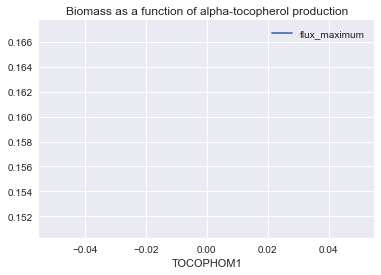

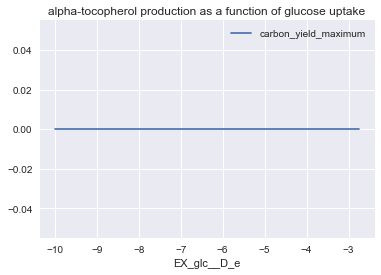

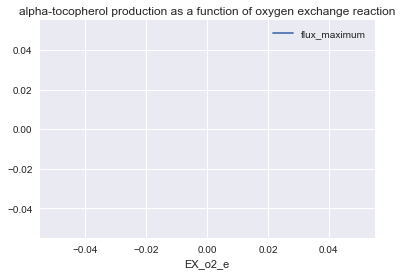

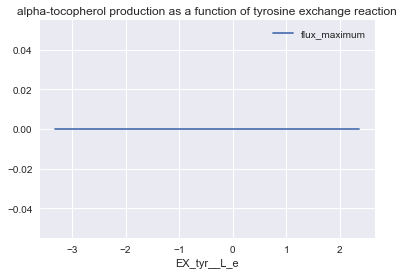

In [12]:
#medium = model.medium
with model:
    tyr_medium['EX_o2_e'] = 0
    model.medium = tyr_medium
    ppp_BIOMASS = production_envelope(model,
            reactions=[model.reactions.DM_avite1_c],
            objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
    ppp_avite = production_envelope(model,
            reactions=[model.reactions.EX_glc__D_e],
            objective=model.reactions.DM_avite1_c)
    ppp_o2 = production_envelope(model,
            reactions=[model.reactions.EX_o2_e],
            objective=model.reactions.DM_avite1_c)
    ppp_tyr = production_envelope(model,
            reactions=[model.reactions.EX_tyr__L_e],
            objective=model.reactions.DM_avite1_c)

ppp_BIOMASS.plot(x='DM_avite1_c', y='flux_maximum', title = 'Biomass as a function of alpha-tocopherol production' ) #carbon yield of biomass as function of glucose uptake
ppp_avite.plot(x='EX_glc__D_e', y='carbon_yield_maximum', title = 'alpha-tocopherol production as a function of glucose uptake') #carbon yield of putrescine as function of glucose uptake
ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'alpha-tocopherol production as a function of oxygen exchange reaction')
ppp_tyr.plot(x='EX_tyr__L_e', y='flux_maximum', title = 'alpha-tocopherol production as a function of tyrosine exchange reaction')

No fluxes under anaerobic conditions